In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit
import copy
from collections import Counter
import random
import itertools

In [2]:
def bin_to_pattern(x):
    return [ [1-int(i), int(i)] for i in x ]
def create_specific_patterns(mode1,mode2,size):
    pats =[]
    for i in range(2):
        for j in range(2):
            pats.append( [[1,1]]*mode1 + bin_to_pattern(str(i)) + [[1,1]]*(mode2-mode1-1) + bin_to_pattern(str(j)) + [[1,1]]*(size-mode1-(mode2-mode1-1)-2) )
    return pats
def create_specific_patterns3(mode1,mode2,mode3,size):
    pats =[]
    for i in range(2):
        for j in range(2):
            for k in range(2):
                pats.append( [[1,1]]*mode1 + bin_to_pattern(str(i)) + [[1,1]]*(mode2-mode1-1) + bin_to_pattern(str(j)) + [[1,1]]*(mode3-(mode2-mode1-1)-mode1-2) + bin_to_pattern(str(k)) + [[1,1]]*(size -mode1-(mode2-mode1-1)-(mode3-(mode2-mode1-1)-mode1-2)-3) )
    return pats
def create_specific_patterns4(mode1,mode2,mode3,mode4,size):
    pats = []
    temp_pats = create_specific_patterns3(mode1,mode2,mode3,size)
    for p in temp_pats:
        for k in range(2):
            p_prime = copy.deepcopy(p)
            p_prime[mode4] = bin_to_pattern(str(k))[0]
            pats.append(p_prime)
    return pats
def create_specific_patterns5(mode1, mode2, mode3, mode4, mode5, size):
    """
    Generate specific patterns for 5 modes.
    """
    pats = []
    temp_pats = create_specific_patterns4(mode1, mode2, mode3, mode4, size)
    for p in temp_pats:
        for k in range(2):
            p_prime = copy.deepcopy(p)
            p_prime[mode5] = bin_to_pattern(str(k))[0]
            pats.append(p_prime)
    return pats
def create_specific_patterns8(mode1, mode2, mode3, mode4, mode5, mode6, mode7, mode8, size):
    """
    Generate specific patterns for 8 modes.
    """
    pats = []
    temp_pats = create_specific_patterns5(mode1, mode2, mode3, mode4, mode5, size)
    for p in temp_pats:
        for k in range(2):
            p_prime = copy.deepcopy(p)
            p_prime[mode6] = bin_to_pattern(str(k))[0]
            for l in range(2):
                p_prime2 = copy.deepcopy(p_prime)
                p_prime2[mode7] = bin_to_pattern(str(l))[0]
                for m in range(2):
                    p_prime3 = copy.deepcopy(p_prime2)
                    p_prime3[mode8] = bin_to_pattern(str(m))[0]
                    pats.append(p_prime3)
    return pats
def dev_pattern(pat):
    f = np.array([1])
    for i in pat:
        f = np.kron(f,i)
    return f

In [3]:
def stringify(seq):
    string = ''
    for n in seq:
        string+=str(n)
    return string

In [4]:
n = 14
sequence_list = np.array([np.array(list(bin(i)[3:]),dtype=np.int32) for i in range(2**n, 2**(n+1))])
len(sequence_list)

16384

In [5]:
def generate_rules_and_rewards(num_rules=5, rule_length=4, reward_range=(1, 20), sequence_length=12):
    """
    Generate rules, rewards, and starting positions for the rules.
    """
    rules = set()
    rewards = []
    starting_positions = []

    while len(rules) < num_rules:
        rule = tuple(np.random.randint(0, 2, size=rule_length))  # Generate a random rule
        if rule not in rules:
            rules.add(rule)
            reward = np.random.randint(reward_range[0], reward_range[1])  # Generate a random reward
            rewards.append(reward)
            # Generate one or more starting positions for the rule
            positions = np.random.choice(range(sequence_length - rule_length + 1), size=np.random.randint(1, 12-rule_length), replace=False)
            starting_positions.append(list(positions))

    return list(rules), rewards, starting_positions


def estimate_cost(sequence, rules, rewards, starting_positions=None):
    """
    Estimate the cost of a sequence based on the rules, rewards, and starting positions.
    """
    if rules== [] or rewards == []:
        return 0

    if starting_positions is None:
        starting_positions = [list(range(len(sequence) - len(rules[0]) + 1))] * len(rules)

    reward = 0
    rule_length = len(rules[0])

    for rule, rule_reward, positions in zip(rules, rewards, starting_positions):
        for k in positions:  # Only check the specified starting positions
            if k + rule_length <= len(sequence) and np.all(sequence[k:k + rule_length] == rule):
                reward += rule_reward
                # break  # Stop checking further positions for this rule if it matches

    return np.abs(reward)

In [7]:
def random_repartition(nb_rules,into=5):
    """
    Generate a random repartition of 5 values whose sum equals nb_rules.
    """
    values = np.random.multinomial(nb_rules, [1/into]*into)
    return values


In [7]:
# Generate all possible rules of size 3 as tuples
all_rules = [tuple(int(x) for x in format(i, '03b')) for i in range(2**3)]

# Generate all possible sets of two rules (as arrays)
all_sets_of_two = [rule_set for rule_set in itertools.combinations(all_rules, 2)] 

((0, 0, 1), (1, 1, 1)) [15, 5]


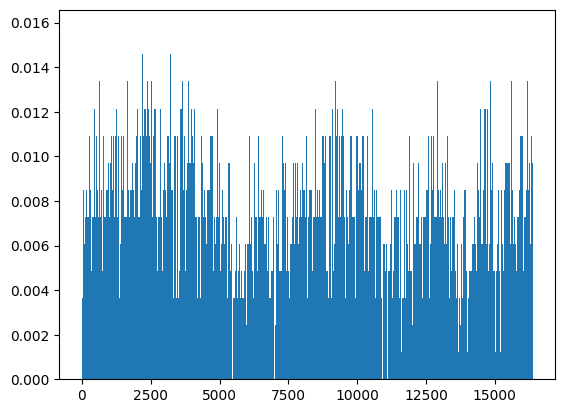

In [9]:
np.random.shuffle(all_sets_of_two)
rules1 = all_sets_of_two[0]
rewards1 = [random.randint(1, 20) for _ in range(len(rules1))]

print(rules1,rewards1)

sequence_cost = []
for sequence in sequence_list:
    rew = 0
    rew += estimate_cost(sequence,rules1, rewards1)
    # rew += estimate_cost(sequence,rules2, rewards2)
    # rew += estimate_cost(sequence,rules3, rewards3)
    sequence_cost.append(rew)
sequence_cost = np.array(sequence_cost)
sequence_cost = sequence_cost /np.linalg.norm(sequence_cost)

plt.bar([i for i in np.arange(len(sequence_list))],sequence_cost,width=1.5)
plt.show()

In [45]:
#pairs
# all_pat = []
# for i in range(n-1):
#     all_pat += create_specific_patterns(i,i+1,n)
# Phi = np.array([dev_pattern(p) for p in all_pat])

#quadruplets
all_pat = []
for i in range(n-3):
    all_pat += create_specific_patterns4(i,i+1,i+2,i+3,n)
Phi = np.array([dev_pattern(p) for p in all_pat])

#quintuplets
# all_pat = []
# for i in range(n-4):
#     all_pat += create_specific_patterns5(i,i+1,i+2,i+3,i+4,n)
# Phi = np.array([dev_pattern(p) for p in all_pat])

#random
Phi = np.random.randn(50,2**n)

y1 = Phi @ sequence_cost
y1 = y1 / np.linalg.norm(y1)

threshold_level = 80
thresh =  np.percentile(sequence_cost, threshold_level)
sequence_cost_thresh = sequence_cost.copy()
sequence_cost_thresh[sequence_cost_thresh < thresh] = 0

y1_thresh = Phi @ sequence_cost_thresh
y1_thresh = y1_thresh / np.linalg.norm(y1_thresh)

var = np.var(sequence_cost)
var_thresh = np.var(sequence_cost_thresh)

In [11]:
distance_different_rules = []
for rule in all_sets_of_two[1:]:
    sequence_cost2 = []
    for sequence in sequence_list:
        rew = 0
        rew += estimate_cost(sequence,rule, rewards1)
        sequence_cost2.append(rew)
    sequence_cost2 = np.array(sequence_cost2)
    sequence_cost2 = sequence_cost2 / np.linalg.norm(sequence_cost2)

    y2 = Phi @ sequence_cost2
    y2 = y2 / np.linalg.norm(y2)

    d = np.linalg.norm(y1-y2)
    distance_different_rules.append(d)
bound = np.min(distance_different_rules)

In [12]:
distance_different_rules_thresh = []
for rule in all_sets_of_two[1:]:
    sequence_cost2 = []
    for sequence in sequence_list:
        rew = 0
        rew += estimate_cost(sequence,rule, rewards1)
        sequence_cost2.append(rew)
    sequence_cost2 = np.array(sequence_cost2)
    sequence_cost2 = sequence_cost2 / np.linalg.norm(sequence_cost2)

    thresh =  np.percentile(sequence_cost2, threshold_level)
    sequence_cost2_thresh = sequence_cost2.copy()
    sequence_cost2_thresh[sequence_cost2_thresh < thresh] = 0
    y2_thresh = Phi @ sequence_cost2_thresh
    y2_thresh = y2_thresh / np.linalg.norm(y2_thresh)

    d = np.linalg.norm(y1_thresh - y2_thresh)
    distance_different_rules_thresh.append(d)
bound_thresh = np.min(distance_different_rules_thresh)

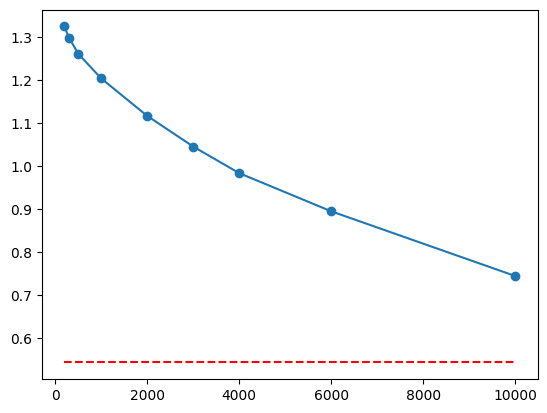

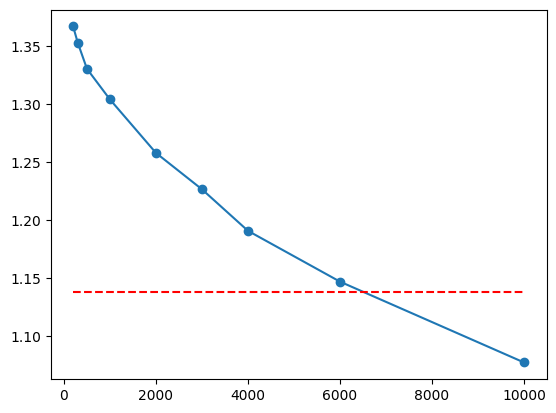

In [38]:
avgdistances = []
avgdistances_thresh = []
sp_size_range = [200,300,500, 1000, 2000, 3000, 4000,6000,10000] 
for sample_size in sp_size_range:

    moments = []
    moments_thresh = []
    for _ in range(1000):
        sample_index = np.random.randint(0,len(sequence_list),sample_size)
        sequence_cost_spectrum = np.zeros_like(sequence_cost)
        sequence_cost_spectrum[sample_index] = sequence_cost[sample_index]

        m = Phi @ sequence_cost_spectrum
        m = m / np.linalg.norm(m)
        moments.append(m)

        thresh =  np.percentile(sequence_cost, threshold_level)
        sequence_cost_spectrum[sequence_cost_spectrum<=thresh]=0

        m = Phi @ sequence_cost_spectrum
        m = m / np.linalg.norm(m)
        moments_thresh.append(m)

    distances = []
    for i in range(1,len(moments)):
        distances.append(np.linalg.norm(moments[i] - y1))
    avgdistances.append(np.average(distances))

    distances = []
    for i in range(1,len(moments)):
        distances.append(np.linalg.norm(moments_thresh[i] - y1))
    avgdistances_thresh.append(np.average(distances))

plt.plot(sp_size_range, avgdistances, marker='o')
# plt.hlines([np.partition(distance_different_rules, 25)[:25]], xmin=sp_size_range[0], xmax=sp_size_range[-1], colors='g', linestyles='--', label='Distances without threshold')
plt.hlines([np.mean(distance_different_rules)], xmin=sp_size_range[0], xmax=sp_size_range[-1], colors='r', linestyles='--', label='Distances without threshold')
plt.show()
plt.plot(sp_size_range, avgdistances_thresh, marker='o')
# plt.hlines([np.partition(distance_different_rules_thresh, 25)[:25]], xmin=sp_size_range[0], xmax=sp_size_range[-1], colors='g', linestyles='--', label='Distances with threshold')
plt.hlines([np.mean(distance_different_rules_thresh)], xmin=sp_size_range[0], xmax=sp_size_range[-1], colors='r', linestyles='--', label='Distances without threshold')
plt.show()

<h2>Test on equation 1</h2>

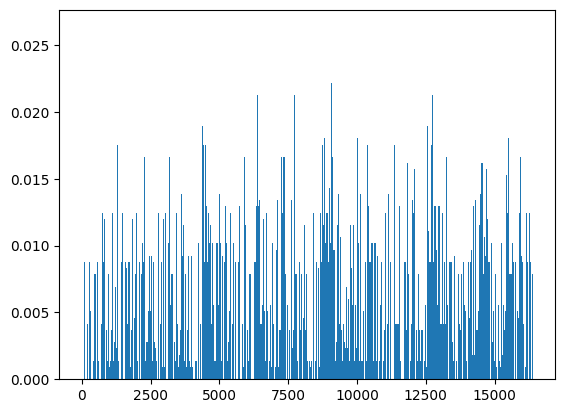

In [8]:
def generate_problem(total_nb_rules=5):
    nb_rules = random_repartition(total_nb_rules,into=3)

    rules1, rewards1,pos1 = generate_rules_and_rewards(num_rules=nb_rules[0],rule_length=4)
    rules2, rewards2,pos2 = generate_rules_and_rewards(num_rules=nb_rules[1],rule_length=5)
    rules3, rewards3,pos3 = generate_rules_and_rewards(num_rules=nb_rules[2],rule_length=6)
    # pos1 = [ [i] for i in np.random.randint(0,8,nb_rules)]

    sequence_cost = []
    for sequence in sequence_list:
        rew = 0
        rew += estimate_cost(sequence,rules1, rewards1)
        rew += estimate_cost(sequence,rules2, rewards2)
        rew += estimate_cost(sequence,rules3, rewards3)
        sequence_cost.append(rew)
    sequence_cost = np.array(sequence_cost)
    sequence_cost = sequence_cost /np.linalg.norm(sequence_cost)

    return sequence_cost

sequence_cost = generate_problem(5)
plt.bar([i for i in np.arange(len(sequence_list))],sequence_cost,width=1.5)
plt.show()

In [9]:
def mean_of_sparse(spectrum):
    mean = 0
    for v in spectrum:
        if v != 0:
            mean += v
    return mean / np.count_nonzero(spectrum)

def variance_of_sparse(spectrum):
    mean = mean_of_sparse(spectrum)
    variance = 0
    for v in spectrum:
        if v != 0:
            variance += (v - mean) ** 2
    return variance / np.count_nonzero(spectrum)

In [22]:
#random
Phi = np.random.uniform(0,1,2**n)

y1 = np.mean(Phi * sequence_cost)
y1

0.0029213312331488423

In [27]:
moment = []
for _ in range(2000):
    sample_index = np.random.randint(0,len(sequence_list),15000)
    sequence_cost_spectrum = np.zeros_like(sequence_cost)
    sequence_cost_spectrum[sample_index] = sequence_cost[sample_index]

    y1_approx = np.mean(Phi*sequence_cost_spectrum)
    moment.append(y1_approx)
np.mean(moment)

0.0017516734840007965

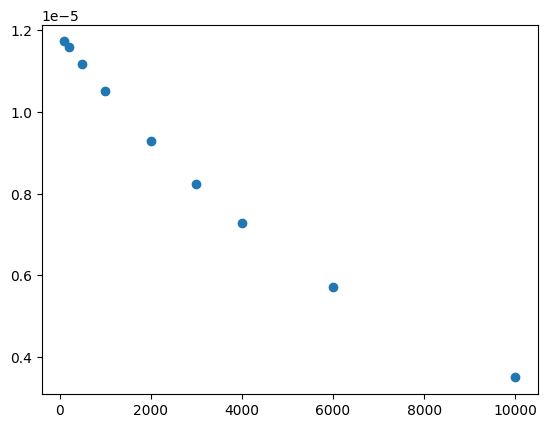

In [192]:
y1_approx = 0
k_range = [100, 200, 500, 1000, 2000, 3000, 4000, 6000, 10000]


distance = []
for k in k_range:
    moment = []
    for _ in range(1000):
        sample_index = np.random.randint(0,len(sequence_list),k)
        sequence_cost_spectrum = np.zeros_like(sequence_cost)
        sequence_cost_spectrum[sample_index] = sequence_cost[sample_index]

        y1_approx = np.mean(Phi*sequence_cost_spectrum)
        moment.append(y1_approx)
    moment = np.array(moment)
    distance.append(np.mean( (moment - y1)**2 ))

plt.scatter(k_range, distance, marker='o')
plt.show()

In [ ]:
sp_size_range = [200,300,500, 1000, 2000, 3000, 4000,6000,10000] 
for sample_size in sp_size_range:

    moments = []
    for _ in range(1000):
        sample_index = np.random.randint(0,len(sequence_list),sample_size)
        sequence_cost_spectrum = np.zeros_like(sequence_cost)
        sequence_cost_spectrum[sample_index] = sequence_cost[sample_index]

        m = Phi @ sequence_cost_spectrum
        m = m / np.linalg.norm(m)
        moments.append(m)

    distances = []
    for i in range(1,len(moments)):
        distances.append(np.linalg.norm(moments[i] - y1))
    avgdistances.append(np.average(distances))



In [21]:
import pandas as pd

def save_avgdistances_to_csv(avgdistances, avgdistances_thresh, filename):
    """
    Save avgdistances and avgdistances_thresh to a CSV file.
    Each will be a column in the CSV.
    """
    df = pd.DataFrame({
        'avgdistances': avgdistances,
        'avgdistances_thresh': avgdistances_thresh
    })
    df.to_csv(filename, index=False)

# Example usage:
# avgdistances = np.random.rand(10)
# avgdistances_thresh = np.random.rand(10)
save_avgdistances_to_csv(avgdistances, avgdistances_thresh, 'output.csv')